#**TWEET SENTIMENT ANALYSIS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Import important libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Load the data set from drive

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/COLAB/twitter_training.csv')
df_val = pd.read_csv('/content/drive/MyDrive/COLAB/twitter_validation.csv')

In [4]:
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
df = pd.concat([df_train, df_val], ignore_index=False)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


* Drop some ireelevant columns and rename  

In [7]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [8]:
df = df.drop(['2401',  '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
        axis=1)

In [9]:
df = df.rename(columns={'Borderlands': 'Branch', 'Positive': 'Sentiment','im getting on borderlands and i will murder you all ,':'Tweet'})

In [10]:
df.isnull().sum()

Branch        999
Sentiment     999
Tweet        1685
dtype: int64

* Remove null valaues from dataset

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Branch       0
Sentiment    0
Tweet        0
dtype: int64

In [12]:
df.duplicated().sum()

3038

* Remove duplicate valaues from dataset

In [13]:
df = df.drop_duplicates()
df.reset_index(inplace=True)

In [14]:
df.drop('index', axis=1, inplace=True)

<ipython-input-14-534f00f11f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)


* Final dataset with 70957 rows and 3 columns

In [15]:
df

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...
70952,Nvidia,Positive,Just realized that the Windows partition of my...
70953,Nvidia,Positive,Just realized that my Mac window partition is ...
70954,Nvidia,Positive,Just realized the windows partition of my Mac ...
70955,Nvidia,Positive,Just realized between the windows partition of...


# **DATA VIZUALIZATION**

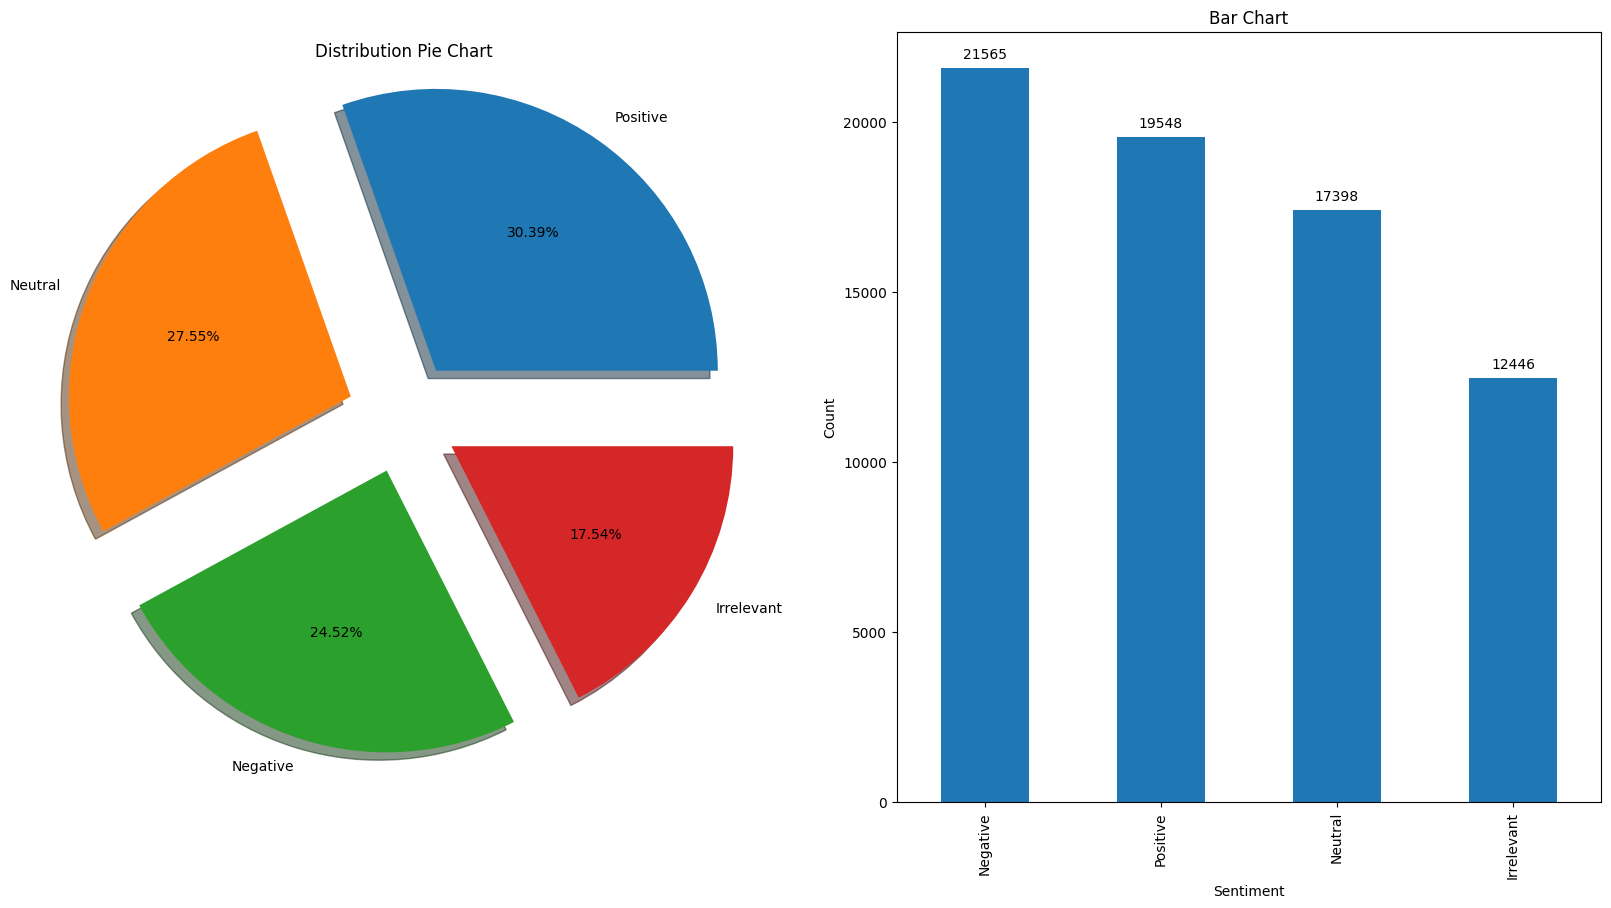

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].pie(df['Sentiment'].value_counts(), labels = df['Sentiment'].unique(), explode=[0.2,0.2,0.2,0.2], autopct='%1.2f%%',shadow=True)
axs[0].set_title('Distribution Pie Chart')

ax = df['Sentiment'].value_counts().plot(kind='bar')
ax.set_title('Bar Chart')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* Libraires for Word Cloud

In [17]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

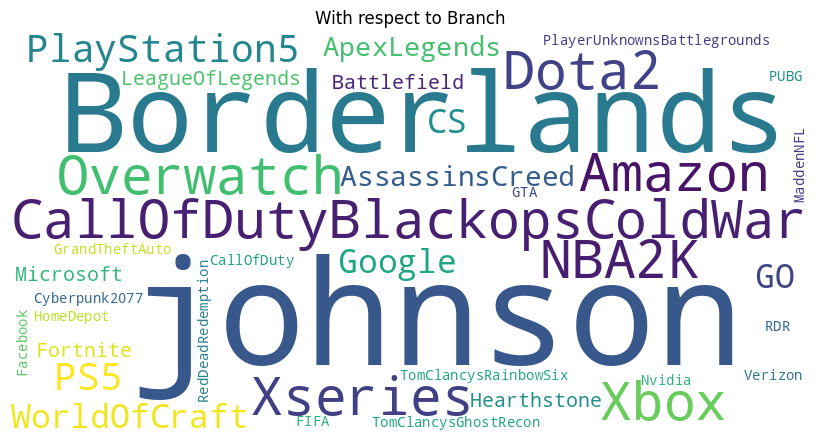

In [18]:
# Word Cloud for Branch
branches= " ".join(df['Branch'].unique())

wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 10).generate(branches)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("With respect to Branch")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

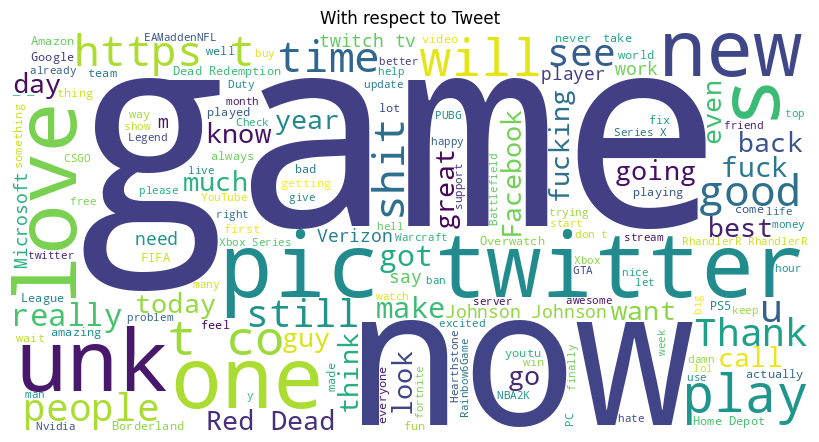

In [19]:
# Word Cloud for Tweets removing stopwords
tweets= " ".join(df['Tweet'].unique())

wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 10, stopwords= stopwords).generate(tweets)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("With respect to Tweet")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **DATA PREPROCESSING**

* Import libraries

In [20]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
def remove_html_tags(text):
    "Remove HTML tags from the text."
    return re.sub(r'<.*?>', '', text)

In [22]:
def remove_urls(text):
    "Remove URLs or hyperlinks from the text."
    return re.sub(r'http\S+|www\S+', '', text)

In [23]:
def tokenize_text(text):
    "Split the text into individual words or tokens"
    return word_tokenize(text)

In [24]:
def preprocess_text(df):
    df['Tweet'] = df['Tweet'].apply(remove_html_tags)
    df['Tweet'] = df['Tweet'].apply(remove_urls)
    return df

In [25]:
df_processed = preprocess_text(df)
df_processed

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...
70952,Nvidia,Positive,Just realized that the Windows partition of my...
70953,Nvidia,Positive,Just realized that my Mac window partition is ...
70954,Nvidia,Positive,Just realized the windows partition of my Mac ...
70955,Nvidia,Positive,Just realized between the windows partition of...


* Lemmatization of tweets

In [26]:
lemma = WordNetLemmatizer()

In [27]:
for i in range(0, len(df_processed)):
    review = re.sub('[^a-zA-Z]', ' ',df_processed['Tweet'][i])
    review = review.lower()
    review = review.split()

    review = [lemma.lemmatize(word) for word in review ]
    review = ' '.join(review)
    df_processed.at[i, 'Tweet'] = review

In [28]:
def preprocess_text(df_processed):
    # Tokenization of tweets
    df_processed['Tweet'] = df_processed['Tweet'].apply(tokenize_text)
    return df_processed

In [29]:
new_df =  preprocess_text(df_processed)
new_df

,Branch,Sentiment,Tweet
0,Borderlands,Positive,"[i, am, coming, to, the, border, and, i, will,..."
1,Borderlands,Positive,"[im, getting, on, borderland, and, i, will, ki..."
2,Borderlands,Positive,"[im, coming, on, borderland, and, i, will, mur..."
3,Borderlands,Positive,"[im, getting, on, borderland, and, i, will, mu..."
4,Borderlands,Positive,"[im, getting, into, borderland, and, i, can, m..."
...,...,...,...
70952,Nvidia,Positive,"[just, realized, that, the, window, partition,..."
70953,Nvidia,Positive,"[just, realized, that, my, mac, window, partit..."
70954,Nvidia,Positive,"[just, realized, the, window, partition, of, m..."
70955,Nvidia,Positive,"[just, realized, between, the, window, partiti..."


In [30]:
# Converting list of words into a single string for tweets
new_df['Tweet'] = new_df['Tweet'].apply(lambda x: ' '.join(x))

# **MODEL BUILDING**

* Import libraries related model building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# features and target
X = new_df['Tweet']
y = new_df['Sentiment']

In [33]:
# Train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


In [34]:
# Initializing and fitting train and test data into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [35]:
# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9210822998872604


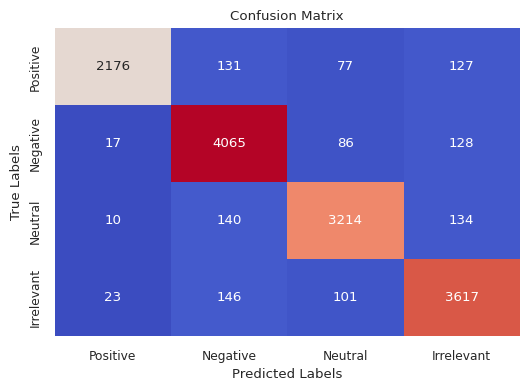

In [36]:
# Confusion Matrix
co_mat = confusion_matrix(y_test, y_pred)
labels = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.set(font_scale=0.8)
ax = sns.heatmap(co_mat, annot=True, fmt='g', cmap='coolwarm', cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title('Confusion Matrix')
plt.show()

In [37]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.98      0.87      0.92      2511
    Negative       0.91      0.95      0.93      4296
     Neutral       0.92      0.92      0.92      3498
    Positive       0.90      0.93      0.92      3887

    accuracy                           0.92     14192
   macro avg       0.93      0.92      0.92     14192
weighted avg       0.92      0.92      0.92     14192



* Get true and predicted value for some initial tweets

In [38]:
i=1
for tweet, real_label, predicted_label in zip(X_test[:5],y_test[:5], y_pred[:5]):
  print(i,'.')
  print(f'Tweet:',{tweet})
  print(f'Actual Label:',{real_label})
  print(f'Predicted Label by Model:',{predicted_label})
  i+=1
  print('\n')

1 .
Tweet: {'can more woman please work at store like circuit and home hardware get bored of condescending men thinking i don t know what another screw is'}
Actual Label: {'Positive'}
Predicted Label by Model: {'Positive'}


2 .
Tweet: {'zai is an absolute beast redd it f e'}
Actual Label: {'Neutral'}
Predicted Label by Model: {'Neutral'}


3 .
Tweet: {'hard fought indeed'}
Actual Label: {'Neutral'}
Predicted Label by Model: {'Neutral'}


4 .
Tweet: {'rhandlerr now i m not a superstar but i have over a solo win this is just criminal and not deserved pic twitter com hillox ffi'}
Actual Label: {'Irrelevant'}
Predicted Label by Model: {'Irrelevant'}


5 .
Tweet: {'ea eamaddennfl the recent announcement that ea ha locked up another long term contract with the nfl is remarkably disrespectful to the fan that have been with madden for year allow competition madden is no longer the quality it once wa'}
Actual Label: {'Negative'}
Predicted Label by Model: {'Negative'}




# **SAVE MODEL**

In [39]:
import pickle
from joblib import Parallel, delayed
import joblib

In [40]:
# Using joblib as it is more efficient on objects that carry large numpy arrays
joblib.dump(clf, 'SA.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

# **TESTING MODEL**

In [41]:
# Load model
model = joblib.load('SA.pkl')

New_tweets =['What a victory for INDIA, This was an unbelievably tense match to watch, so so many twists and turns. But special thanks to Rohit, Virat, Bumrah and Suryakumar for this win!',
             'I just like being negative sorry.',
             'Modi has systematically destroyed prestigious institutions of India. In BJP govt’s rule, institutional autonomy and democracy have been under attack.'
]

# Convert tweets to numerical form
to_predict= vectorizer.transform(New_tweets)
predictions = model.predict(to_predict)


In [42]:
# Print prediction
i=1
for tweet, pred in zip(New_tweets, predictions):
  print(i,'.')
  print(f'Tweet: {tweet}')
  print(f'Sentiment: {pred}')
  print('\n')
  i+=1

1 .
Tweet: What a victory for INDIA, This was an unbelievably tense match to watch, so so many twists and turns. But special thanks to Rohit, Virat, Bumrah and Suryakumar for this win!
Sentiment: Positive


2 .
Tweet: I just like being negative sorry.
Sentiment: Positive


3 .
Tweet: Modi has systematically destroyed prestigious institutions of India. In BJP govt’s rule, institutional autonomy and democracy have been under attack.
Sentiment: Neutral




* Using stramlit to make small UI for Sentment Analysis

In [43]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 478.8 kB/s eta 0:00:00


* The line %%writefile app.py writes the Streamlit app code to a file named app.py

In [44]:
%%writefile app.py
import streamlit as st
import re
import joblib
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
my_model = joblib.load('SA.pkl')
vectorizer = joblib.load('vectorizer.pkl')


# Preprocessing function
def preprocess(text):
  text = re.sub(r'<.*?>', '', text) # html
  text = re.sub(r'http\S+|www\S+', '', text)  #url
  text  =re.sub('[^a-zA-Z]', ' ',text)  # A-Z and a-z
  text = text.lower()
  tokens = word_tokenize(text)   # tokenize
  tokens = [lemma.lemmatize(word) for word in tokens] # lemmatize
  return ''.join(text)

# Function to make a prediction
def prediction(tweet):
    # Preprocess the tweet
    processed_tweet = preprocess(tweet)
    # Transform the tweet with the TF-IDF vectorizer
    tweet_vector = vectorizer.transform([processed_tweet])
    # Make the prediction
    prediction = my_model.predict(tweet_vector)
    return prediction[0]

# Main function for Streamlit app
def main():

    st.set_page_config(page_title='Sentiment Analysis')
    # Title of the web page
    st.title("Tweet Sentiment Prediction")

    # Text box for user input
    tweet = st.text_input("Enter Tweet Here", placeholder="Enter tweet to analyze for sentiment....")
    result = ""

    if st.button("Predict"):
        result = prediction(tweet)
    st.success(f'The sentiment is: {result}')

if __name__ == '__main__':
    main()


Writing app.py


In [ ]:
# It retrieves your external IP address using the wget command
# address from here should be pasted at Tunnel Password on URL to see UI
!wget -q -O - ipv4.icanhazip.com


*  !streamlit run app.py &: Runs the Streamlit app in the background so the Colab notebook can continue executing other cells.

* !npx localtunnel --port 8501: Exposes the Streamlit app to the internet on port 8501, providing a public URL for access.





In [ ]:
!streamlit run app.py & npx localtunnel --port 8501